In [1]:
#import numpy as np
#import pandas as pd
#import matplotlib.pyplot as plt
#import seaborn as sns



import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (17, 5)
plt.rcParams.update({'font.size': 16})
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns


import sklearn.neighbors as skn
import sklearn.metrics as skm

In [2]:
#Read in
#Rows = 5043
mmdf = pd.read_csv('movie_metadata.csv')

In [3]:
mmdf.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
mmdf = mmdf.drop(columns = ['director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'cast_total_facebook_likes', 'facenumber_in_poster', 'actor_2_facebook_likes', 'movie_imdb_link', 'num_voted_users', 'num_critic_for_reviews', 'color','movie_facebook_likes','plot_keywords','aspect_ratio', 'num_user_for_reviews'], axis = 1)
#dropped all facebook like columns (director, actors 1-3, cast_total, movie_facebook_likes) because of multiple columns displaying values of 0
mmdf

,director_name,duration,actor_2_name,gross,genres,actor_1_name,movie_title,actor_3_name,language,country,content_rating,budget,title_year,imdb_score
0,James Cameron,178.0,Joel David Moore,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,Wes Studi,English,USA,PG-13,237000000.0,2009.0,7.9
1,Gore Verbinski,169.0,Orlando Bloom,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,Jack Davenport,English,USA,PG-13,300000000.0,2007.0,7.1
2,Sam Mendes,148.0,Rory Kinnear,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,Stephanie Sigman,English,UK,PG-13,245000000.0,2015.0,6.8
3,Christopher Nolan,164.0,Christian Bale,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,Joseph Gordon-Levitt,English,USA,PG-13,250000000.0,2012.0,8.5
4,Doug Walker,NaN,Rob Walker,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,NaN,NaN,NaN,NaN,7.1
5,Andrew Stanton,132.0,Samantha Morton,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,Polly Walker,English,USA,PG-13,263700000.0,2012.0,6.6
6,Sam Raimi,156.0,James Franco,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,Kirsten Dunst,English,USA,PG-13,258000000.0,2007.0,6.2
7,Nathan Greno,100.0,Donna Murphy,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,M.C. Gainey,English,USA,PG,260000000.0,2010.0,7.8
8,Joss Whedon,141.0,Robert Downey Jr.,458991599.0,Action|Adventure|Sci-Fi,Chris Hemsworth,Avengers: Age of Ultron,Scarlett Johansson,English,USA,PG-13,250000000.0,2015.0,7.5
9,David Yates,153.0,Daniel Radcliffe,301956980.0,Adventure|Family|Fantasy|Mystery,Alan Rickman,Harry Potter and the Half-Blood Prince,Rupert Grint,English,UK,PG,250000000.0,2009.0,7.5


In [5]:
cr = mmdf['content_rating'].value_counts().to_dict()
tv = cr['TV-14']
tv

30

In [6]:
mmdf['content_rating'].value_counts()

R            2118
PG-13        1461
PG            701
Not Rated     116
G             112
Unrated        62
Approved       55
TV-14          30
TV-MA          20
TV-PG          13
X              13
TV-G           10
Passed          9
NC-17           7
GP              6
M               5
TV-Y7           1
TV-Y            1
Name: content_rating, dtype: int64

In [7]:
#Takes out rows rated 'TV-14'
#Rows = 5013
mmdf = mmdf[mmdf.content_rating != 'TV-14']
mmdf = mmdf[mmdf.content_rating != 'TV-Y']
mmdf = mmdf[mmdf.content_rating != 'TV-Y7']
mmdf = mmdf[mmdf.content_rating != 'M']
mmdf = mmdf[mmdf.content_rating != 'GP']
mmdf = mmdf[mmdf.content_rating != 'NC-17']
mmdf = mmdf[mmdf.content_rating != 'Passed']
mmdf = mmdf[mmdf.content_rating != 'TV-PG']
mmdf = mmdf[mmdf.content_rating != 'TV-MA']
mmdf = mmdf[mmdf.content_rating != 'x']
mmdf

,director_name,duration,actor_2_name,gross,genres,actor_1_name,movie_title,actor_3_name,language,country,content_rating,budget,title_year,imdb_score
0,James Cameron,178.0,Joel David Moore,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,Wes Studi,English,USA,PG-13,237000000.0,2009.0,7.9
1,Gore Verbinski,169.0,Orlando Bloom,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,Jack Davenport,English,USA,PG-13,300000000.0,2007.0,7.1
2,Sam Mendes,148.0,Rory Kinnear,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,Stephanie Sigman,English,UK,PG-13,245000000.0,2015.0,6.8
3,Christopher Nolan,164.0,Christian Bale,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,Joseph Gordon-Levitt,English,USA,PG-13,250000000.0,2012.0,8.5
4,Doug Walker,NaN,Rob Walker,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,NaN,NaN,NaN,NaN,7.1
5,Andrew Stanton,132.0,Samantha Morton,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,Polly Walker,English,USA,PG-13,263700000.0,2012.0,6.6
6,Sam Raimi,156.0,James Franco,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,Kirsten Dunst,English,USA,PG-13,258000000.0,2007.0,6.2
7,Nathan Greno,100.0,Donna Murphy,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,M.C. Gainey,English,USA,PG,260000000.0,2010.0,7.8
8,Joss Whedon,141.0,Robert Downey Jr.,458991599.0,Action|Adventure|Sci-Fi,Chris Hemsworth,Avengers: Age of Ultron,Scarlett Johansson,English,USA,PG-13,250000000.0,2015.0,7.5
9,David Yates,153.0,Daniel Radcliffe,301956980.0,Adventure|Family|Fantasy|Mystery,Alan Rickman,Harry Potter and the Half-Blood Prince,Rupert Grint,English,UK,PG,250000000.0,2009.0,7.5


In [8]:
mmdf['content_rating'].value_counts()

R            2118
PG-13        1461
PG            701
Not Rated     116
G             112
Unrated        62
Approved       55
X              13
TV-G           10
Name: content_rating, dtype: int64

In [9]:
#prints remaining rows with nan values
n_nan = mmdf[0:].isna().sum()
print(n_nan)

director_name      45
duration           14
actor_2_name       13
gross             806
genres              0
actor_1_name        7
movie_title         0
actor_3_name       23
language           12
country             3
content_rating    303
budget            433
title_year         49
imdb_score          0
dtype: int64


In [10]:
#drop rows with nan values.
#Rows = 3761
mmdf = mmdf.dropna(how = 'any')
mmdf

,director_name,duration,actor_2_name,gross,genres,actor_1_name,movie_title,actor_3_name,language,country,content_rating,budget,title_year,imdb_score
0,James Cameron,178.0,Joel David Moore,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,Wes Studi,English,USA,PG-13,237000000.0,2009.0,7.9
1,Gore Verbinski,169.0,Orlando Bloom,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,Jack Davenport,English,USA,PG-13,300000000.0,2007.0,7.1
2,Sam Mendes,148.0,Rory Kinnear,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,Stephanie Sigman,English,UK,PG-13,245000000.0,2015.0,6.8
3,Christopher Nolan,164.0,Christian Bale,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,Joseph Gordon-Levitt,English,USA,PG-13,250000000.0,2012.0,8.5
5,Andrew Stanton,132.0,Samantha Morton,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,Polly Walker,English,USA,PG-13,263700000.0,2012.0,6.6
6,Sam Raimi,156.0,James Franco,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,Kirsten Dunst,English,USA,PG-13,258000000.0,2007.0,6.2
7,Nathan Greno,100.0,Donna Murphy,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,M.C. Gainey,English,USA,PG,260000000.0,2010.0,7.8
8,Joss Whedon,141.0,Robert Downey Jr.,458991599.0,Action|Adventure|Sci-Fi,Chris Hemsworth,Avengers: Age of Ultron,Scarlett Johansson,English,USA,PG-13,250000000.0,2015.0,7.5
9,David Yates,153.0,Daniel Radcliffe,301956980.0,Adventure|Family|Fantasy|Mystery,Alan Rickman,Harry Potter and the Half-Blood Prince,Rupert Grint,English,UK,PG,250000000.0,2009.0,7.5
10,Zack Snyder,183.0,Lauren Cohan,330249062.0,Action|Adventure|Sci-Fi,Henry Cavill,Batman v Superman: Dawn of Justice,Alan D. Purwin,English,USA,PG-13,250000000.0,2016.0,6.9


In [11]:
#Filter by movie years > 1985
mmdf = mmdf[mmdf.title_year >= 1985]
mmdf

,director_name,duration,actor_2_name,gross,genres,actor_1_name,movie_title,actor_3_name,language,country,content_rating,budget,title_year,imdb_score
0,James Cameron,178.0,Joel David Moore,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,Wes Studi,English,USA,PG-13,237000000.0,2009.0,7.9
1,Gore Verbinski,169.0,Orlando Bloom,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,Jack Davenport,English,USA,PG-13,300000000.0,2007.0,7.1
2,Sam Mendes,148.0,Rory Kinnear,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,Stephanie Sigman,English,UK,PG-13,245000000.0,2015.0,6.8
3,Christopher Nolan,164.0,Christian Bale,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,Joseph Gordon-Levitt,English,USA,PG-13,250000000.0,2012.0,8.5
5,Andrew Stanton,132.0,Samantha Morton,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,Polly Walker,English,USA,PG-13,263700000.0,2012.0,6.6
6,Sam Raimi,156.0,James Franco,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,Kirsten Dunst,English,USA,PG-13,258000000.0,2007.0,6.2
7,Nathan Greno,100.0,Donna Murphy,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,M.C. Gainey,English,USA,PG,260000000.0,2010.0,7.8
8,Joss Whedon,141.0,Robert Downey Jr.,458991599.0,Action|Adventure|Sci-Fi,Chris Hemsworth,Avengers: Age of Ultron,Scarlett Johansson,English,USA,PG-13,250000000.0,2015.0,7.5
9,David Yates,153.0,Daniel Radcliffe,301956980.0,Adventure|Family|Fantasy|Mystery,Alan Rickman,Harry Potter and the Half-Blood Prince,Rupert Grint,English,UK,PG,250000000.0,2009.0,7.5
10,Zack Snyder,183.0,Lauren Cohan,330249062.0,Action|Adventure|Sci-Fi,Henry Cavill,Batman v Superman: Dawn of Justice,Alan D. Purwin,English,USA,PG-13,250000000.0,2016.0,6.9


In [12]:
mmdf.set_index('movie_title', inplace = True)

In [13]:
mmdf

,director_name,duration,actor_2_name,gross,genres,actor_1_name,actor_3_name,language,country,content_rating,budget,title_year,imdb_score
movie_title,,,,,,,,,,,,,
Avatar,James Cameron,178.0,Joel David Moore,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Wes Studi,English,USA,PG-13,237000000.0,2009.0,7.9
Pirates of the Caribbean: At World's End,Gore Verbinski,169.0,Orlando Bloom,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Jack Davenport,English,USA,PG-13,300000000.0,2007.0,7.1
Spectre,Sam Mendes,148.0,Rory Kinnear,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Stephanie Sigman,English,UK,PG-13,245000000.0,2015.0,6.8
The Dark Knight Rises,Christopher Nolan,164.0,Christian Bale,448130642.0,Action|Thriller,Tom Hardy,Joseph Gordon-Levitt,English,USA,PG-13,250000000.0,2012.0,8.5
John Carter,Andrew Stanton,132.0,Samantha Morton,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,Polly Walker,English,USA,PG-13,263700000.0,2012.0,6.6
Spider-Man 3,Sam Raimi,156.0,James Franco,336530303.0,Action|Adventure|Romance,J.K. Simmons,Kirsten Dunst,English,USA,PG-13,258000000.0,2007.0,6.2
Tangled,Nathan Greno,100.0,Donna Murphy,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,M.C. Gainey,English,USA,PG,260000000.0,2010.0,7.8
Avengers: Age of Ultron,Joss Whedon,141.0,Robert Downey Jr.,458991599.0,Action|Adventure|Sci-Fi,Chris Hemsworth,Scarlett Johansson,English,USA,PG-13,250000000.0,2015.0,7.5
Harry Potter and the Half-Blood Prince,David Yates,153.0,Daniel Radcliffe,301956980.0,Adventure|Family|Fantasy|Mystery,Alan Rickman,Rupert Grint,English,UK,PG,250000000.0,2009.0,7.5


In [14]:
columnsTitles = ['director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name','genres','content_rating','language', 'country','title_year','duration', 'budget','gross','imdb_score']
mmdf=mmdf[columnsTitles]
mmdf

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,content_rating,language,country,title_year,duration,budget,gross,imdb_score
movie_title,,,,,,,,,,,,,
Avatar,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,PG-13,English,USA,2009.0,178.0,237000000.0,760505847.0,7.9
Pirates of the Caribbean: At World's End,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,PG-13,English,USA,2007.0,169.0,300000000.0,309404152.0,7.1
Spectre,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,PG-13,English,UK,2015.0,148.0,245000000.0,200074175.0,6.8
The Dark Knight Rises,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,PG-13,English,USA,2012.0,164.0,250000000.0,448130642.0,8.5
John Carter,Andrew Stanton,Daryl Sabara,Samantha Morton,Polly Walker,Action|Adventure|Sci-Fi,PG-13,English,USA,2012.0,132.0,263700000.0,73058679.0,6.6
Spider-Man 3,Sam Raimi,J.K. Simmons,James Franco,Kirsten Dunst,Action|Adventure|Romance,PG-13,English,USA,2007.0,156.0,258000000.0,336530303.0,6.2
Tangled,Nathan Greno,Brad Garrett,Donna Murphy,M.C. Gainey,Adventure|Animation|Comedy|Family|Fantasy|Musi...,PG,English,USA,2010.0,100.0,260000000.0,200807262.0,7.8
Avengers: Age of Ultron,Joss Whedon,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,Action|Adventure|Sci-Fi,PG-13,English,USA,2015.0,141.0,250000000.0,458991599.0,7.5
Harry Potter and the Half-Blood Prince,David Yates,Alan Rickman,Daniel Radcliffe,Rupert Grint,Adventure|Family|Fantasy|Mystery,PG,English,UK,2009.0,153.0,250000000.0,301956980.0,7.5


In [15]:
def tidy_split(df, column, sep='|', keep=False):
    """
    Split the values of a column and expand so the new DataFrame has one split
    value per row. Filters rows where the column is missing.

    Params
    ------
    df : pandas.DataFrame
        dataframe with the column to split and expand
    column : str
        the column to split and expand
    sep : str
        the string used to split the column's values
    keep : bool
        whether to retain the presplit value as it's own row

    Returns
    -------
    pandas.DataFrame
        Returns a dataframe with the same columns as `df`.
    """
    indexes = list()
    new_values = list()
    df = df.dropna(subset=[column])
    for i, presplit in enumerate(df[column].astype(str)):
        values = presplit.split(sep)
        if keep and len(values) > 1:
            indexes.append(i)
            new_values.append(presplit)
        for value in values:
            indexes.append(i)
            new_values.append(value)
    new_df = df.iloc[indexes, :].copy()
    new_df[column] = new_values
    return new_df

In [16]:
mmdf_genre= tidy_split(mmdf,'genres', sep='|')

mmdf_genre

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,content_rating,language,country,title_year,duration,budget,gross,imdb_score
movie_title,,,,,,,,,,,,,
Avatar,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action,PG-13,English,USA,2009.0,178.0,237000000.0,760505847.0,7.9
Avatar,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Adventure,PG-13,English,USA,2009.0,178.0,237000000.0,760505847.0,7.9
Avatar,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Fantasy,PG-13,English,USA,2009.0,178.0,237000000.0,760505847.0,7.9
Avatar,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Sci-Fi,PG-13,English,USA,2009.0,178.0,237000000.0,760505847.0,7.9
Pirates of the Caribbean: At World's End,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action,PG-13,English,USA,2007.0,169.0,300000000.0,309404152.0,7.1
Pirates of the Caribbean: At World's End,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Adventure,PG-13,English,USA,2007.0,169.0,300000000.0,309404152.0,7.1
Pirates of the Caribbean: At World's End,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Fantasy,PG-13,English,USA,2007.0,169.0,300000000.0,309404152.0,7.1
Spectre,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action,PG-13,English,UK,2015.0,148.0,245000000.0,200074175.0,6.8
Spectre,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Adventure,PG-13,English,UK,2015.0,148.0,245000000.0,200074175.0,6.8


In [17]:
mmdf_genre['title_year']=mmdf_genre['title_year'].astype(int)

mmdf_genre

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,content_rating,language,country,title_year,duration,budget,gross,imdb_score
movie_title,,,,,,,,,,,,,
Avatar,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action,PG-13,English,USA,2009,178.0,237000000.0,760505847.0,7.9
Avatar,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Adventure,PG-13,English,USA,2009,178.0,237000000.0,760505847.0,7.9
Avatar,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Fantasy,PG-13,English,USA,2009,178.0,237000000.0,760505847.0,7.9
Avatar,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Sci-Fi,PG-13,English,USA,2009,178.0,237000000.0,760505847.0,7.9
Pirates of the Caribbean: At World's End,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action,PG-13,English,USA,2007,169.0,300000000.0,309404152.0,7.1
Pirates of the Caribbean: At World's End,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Adventure,PG-13,English,USA,2007,169.0,300000000.0,309404152.0,7.1
Pirates of the Caribbean: At World's End,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Fantasy,PG-13,English,USA,2007,169.0,300000000.0,309404152.0,7.1
Spectre,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action,PG-13,English,UK,2015,148.0,245000000.0,200074175.0,6.8
Spectre,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Adventure,PG-13,English,UK,2015,148.0,245000000.0,200074175.0,6.8


In [18]:
mmdf_genre=mmdf_genre[mmdf_genre.country =='USA']
mmdf_genre


,director_name,actor_1_name,actor_2_name,actor_3_name,genres,content_rating,language,country,title_year,duration,budget,gross,imdb_score
movie_title,,,,,,,,,,,,,
Avatar,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action,PG-13,English,USA,2009,178.0,237000000.0,760505847.0,7.9
Avatar,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Adventure,PG-13,English,USA,2009,178.0,237000000.0,760505847.0,7.9
Avatar,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Fantasy,PG-13,English,USA,2009,178.0,237000000.0,760505847.0,7.9
Avatar,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Sci-Fi,PG-13,English,USA,2009,178.0,237000000.0,760505847.0,7.9
Pirates of the Caribbean: At World's End,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action,PG-13,English,USA,2007,169.0,300000000.0,309404152.0,7.1
Pirates of the Caribbean: At World's End,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Adventure,PG-13,English,USA,2007,169.0,300000000.0,309404152.0,7.1
Pirates of the Caribbean: At World's End,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Fantasy,PG-13,English,USA,2007,169.0,300000000.0,309404152.0,7.1
The Dark Knight Rises,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action,PG-13,English,USA,2012,164.0,250000000.0,448130642.0,8.5
The Dark Knight Rises,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Thriller,PG-13,English,USA,2012,164.0,250000000.0,448130642.0,8.5


In [19]:
mmdf_genre['language'].value_counts()



English       8581
Spanish         17
Maya             4
Bosnian          3
Japanese         3
Filipino         3
None             2
Dari             1
Aramaic          1
Vietnamese       1
Name: language, dtype: int64

In [34]:
desc = mmdf_genre.describe()
desc

,title_year,duration,budget,gross,imdb_score
count,8616.000000,8616.000000,8.616000e+03,8.616000e+03,8616.000000
mean,2004.338092,109.089833,4.775949e+07,6.367693e+07,6.353412
std,7.238818,20.929177,4.686870e+07,7.717881e+07,1.025179
min,1985.000000,37.000000,2.180000e+02,7.030000e+02,1.600000
25%,1999.000000,95.000000,1.500000e+07,1.409530e+07,5.800000
50%,2005.000000,105.000000,3.200000e+07,3.811948e+07,6.400000
75%,2010.000000,119.000000,6.500000e+07,8.242287e+07,7.000000
max,2016.000000,330.000000,3.000000e+08,7.605058e+08,9.300000


Text(0.5, 1.0, "IMDB scores for movies of 'X' year")

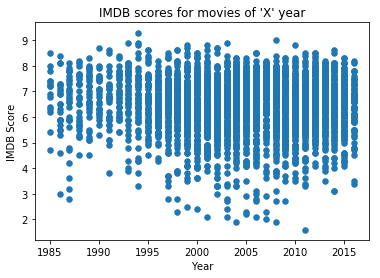

In [50]:
plt.scatter(x=mmdf['title_year'], y=mmdf['imdb_score'], s=30)
plt.xlabel('Year')
plt.ylabel('IMDB Score')
plt.title("IMDB scores for movies of 'X' year")

Text(0, 0.5, 'IMDB Score')

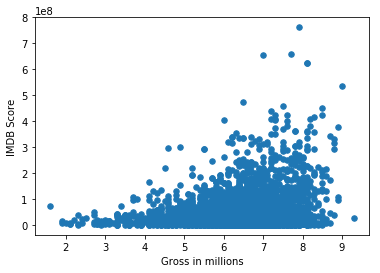

In [55]:
plt.scatter(x=mmdf['imdb_score'], y=mmdf['gross'], s=30)
plt.ylabel('Gross in millions')
plt.xlabel('IMDB Score')
plt.title()

Text(0.5, 1.0, 'IMDB Scoe VS. Budget')

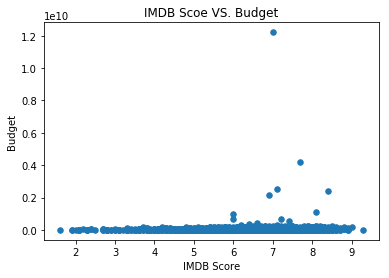

In [56]:
plt.scatter(x=mmdf['imdb_score'], y=mmdf['budget'], s=30)
plt.xlabel('IMDB Score')
plt.ylabel('Budget')
plt.title('IMDB Scoe VS. Budget')

In [32]:
corr = mmdf_genre.corr()
corr

,title_year,duration,budget,gross,imdb_score
title_year,1.000000,-0.007616,0.246187,0.115894,-0.013800
duration,-0.007616,1.000000,0.300402,0.264414,0.369467
budget,0.246187,0.300402,1.000000,0.663758,0.121829
gross,0.115894,0.264414,0.663758,1.000000,0.290577
imdb_score,-0.013800,0.369467,0.121829,0.290577,1.000000


Text(0.5, 1.0, 'Number of Movies in Dataset Released Each Year')

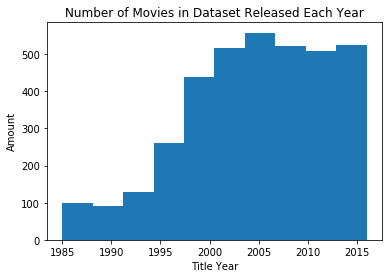

In [58]:
plt.hist(x=mmdf['title_year'])
plt.xlabel('Title Year')
plt.ylabel('Amount')
plt.title('Number of Movies in Dataset Released Each Year')

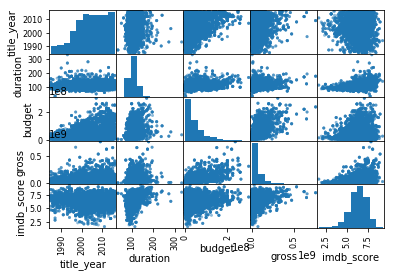

In [26]:
fig=pd.plotting.scatter_matrix(mmdf_genre)

Text(0.5, 1.0, 'Total Number of Each Genre Caegory in Dataset ')

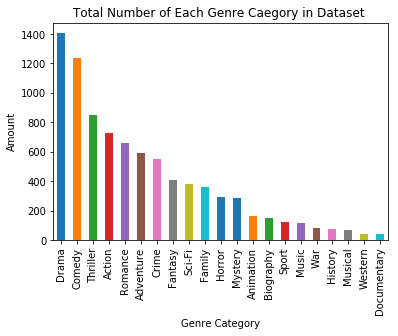

In [61]:
major_counts= mmdf_genre['genres'].value_counts()
major_counts.plot.bar()
plt.xlabel('Genre Category')
plt.ylabel('Amount')
plt.title('Total Number of Each Genre Caegory in Dataset ')

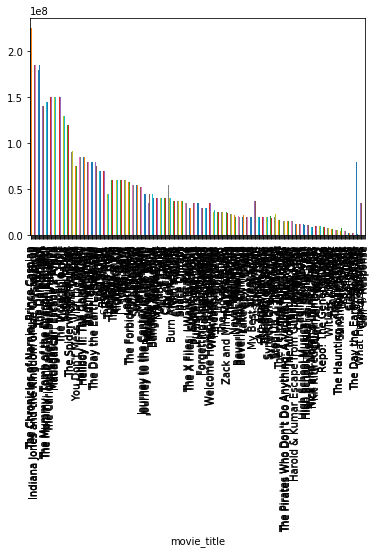

In [28]:
a=(mmdf_genre['budget'].loc[mmdf_genre.title_year == 2008])
a.plot.bar()

Text(0.5, 1.0, 'Distribution of Films in our Dataset')

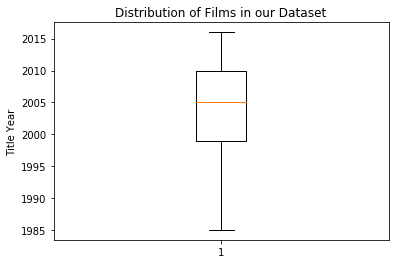

In [62]:
plt.boxplot(mmdf_genre['title_year'])
plt.ylabel('Title Year')
plt.title('Distribution of Films in our Dataset')

Text(0.5, 1.0, 'Spread of IMDB Scores in our dataset')

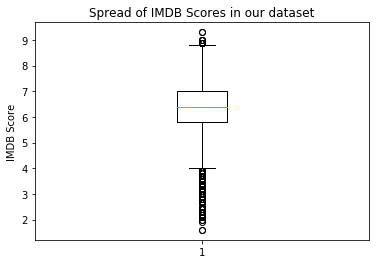

In [63]:
plt.boxplot(mmdf_genre['imdb_score'])
plt.ylabel('IMDB Score')
plt.title('Spread of IMDB Scores in our dataset')

Text(0.5, 1.0, 'Spread of Duration lenghts of movies in our dataset')

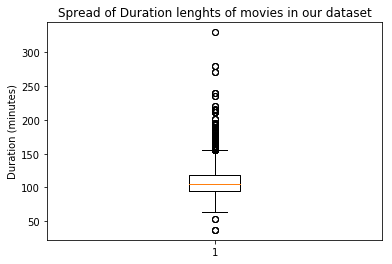

In [64]:
plt.boxplot(mmdf_genre['duration'])
plt.ylabel('Duration (minutes)')
plt.title('Spread of Duration lenghts of movies in our dataset')

Text(0.5, 1.0, 'Duration and Budget Relationship')

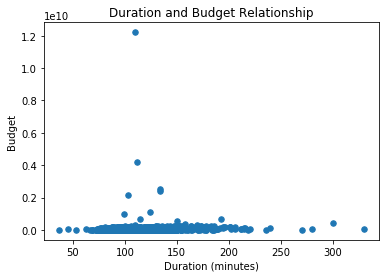

In [68]:
plt.scatter(x=mmdf['duration'], y=mmdf['budget'], s=30)
plt.xlabel('Duration (minutes)')
plt.ylabel('Budget')

plt.title('Duration and Budget Relationship')

Text(0, 0.5, 'Budget')

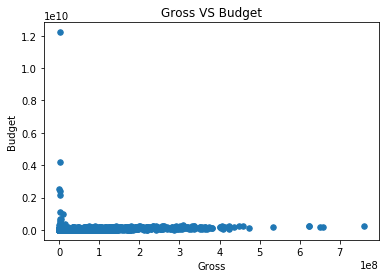

In [69]:
plt.scatter(x=mmdf['gross'], y=mmdf['budget'], s=30)
plt.title("Gross VS Budget")
plt.xlabel('Gross')
plt.ylabel('Budget')



Text(0.5, 1.0, 'Total Number of Movies per Content Rating')

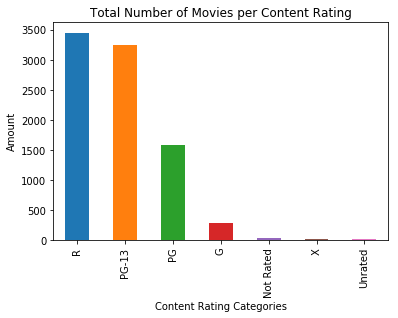

In [72]:
genre_counts=(mmdf_genre['content_rating'].value_counts())
genre_counts.plot.bar()
plt.xlabel('Content Rating Categories')
plt.ylabel("Amount")
plt.title("Total Number of Movies per Content Rating")

Text(0, 0.5, 'Number of Movies')

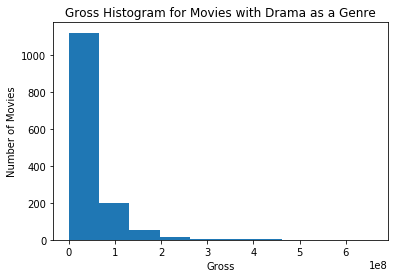

In [75]:
plt.hist(mmdf_genre['gross'].loc[mmdf_genre['genres']=="Drama"])
plt.title("Gross Histogram for Movies with Drama as a Genre")
plt.xlabel('Gross')
plt.ylabel("Number of Movies")

Text(0, 0.5, 'Number of Movies')

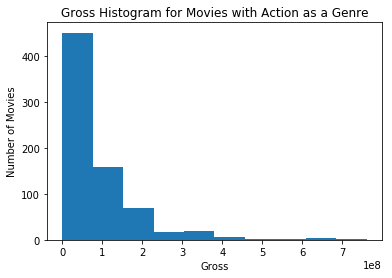

In [76]:
plt.hist(mmdf_genre['gross'].loc[mmdf_genre['genres']=="Action"])
plt.title("Gross Histogram for Movies with Action as a Genre")
plt.xlabel('Gross')
plt.ylabel("Number of Movies")


Text(0, 0.5, 'Number of Movies')

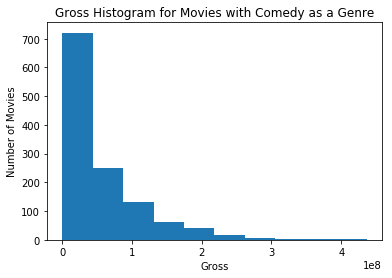

In [77]:
plt.hist(mmdf_genre['gross'].loc[mmdf_genre['genres']=="Comedy"])
plt.title("Gross Histogram for Movies with Comedy as a Genre")
plt.xlabel('Gross')
plt.ylabel("Number of Movies")
